In [78]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [79]:
# uploading dataset
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (2).csv


In [80]:
data=pd.read_csv("crime_data.csv",)
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# **EDA**

In [81]:
data.shape

(50, 5)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [83]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [84]:
data.isnull().sum()   # no null values

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [85]:
data.duplicated().sum()

0

In [86]:
data[data.duplicated()]  # No duplicated values

,Murder,Assault,UrbanPop,Rape


# **KMeans Clustering**

In [87]:
# importing KMeans Clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [89]:
kmeans_data=data

In [90]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans_scaled_data =scaler.fit_transform(kmeans_data)

In [91]:
kmeans_scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Model Building

In [92]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(kmeans_scaled_data)

KMeans(n_clusters=3, random_state=0)

In [93]:
predict=kmeans.fit_predict(kmeans_scaled_data)

In [94]:
predict

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [95]:
kmeans.inertia_

80.0888613219962

**Hyper Parameter Tuning**

In [96]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  predict=kmeans.fit_predict(kmeans_scaled_data)
  wcss.append(kmeans.inertia_)

In [97]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.0888613219962,
 57.55425863091105,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.311639397122548]

**Elbow Plot**

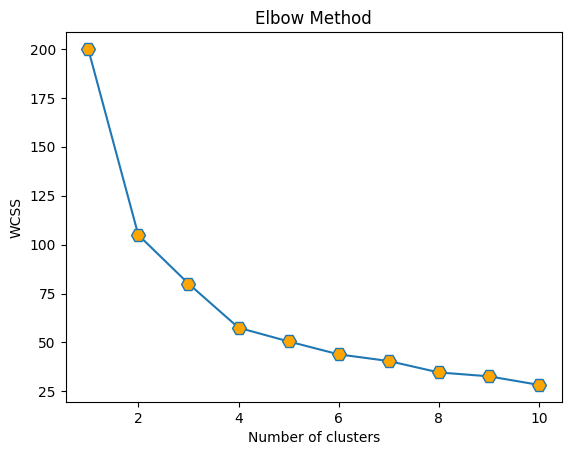

In [98]:
# elbow plot
plt.plot(range(1, 11), wcss,marker='H',markersize=10,markerfacecolor='orange')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [99]:
# we taking number of cluster as 4
final_model=KMeans(n_clusters=4,random_state=0)
final_model.fit(kmeans_scaled_data)

KMeans(n_clusters=4, random_state=0)

In [100]:
final_model.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [101]:
# creating a new column Label
kmeans_data["kmeans_Label"]=final_model.labels_
kmeans_data

,Murder,Assault,UrbanPop,Rape,kmeans_Label
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [102]:
# grouping by Labels
kmeans_grp=data.groupby('kmeans_Label')

In [103]:
for x,y in kmeans_grp:
  print(y)
  print('_'*60)

    Murder  Assault  UrbanPop  Rape  kmeans_Label
6      3.3      110        77  11.1             0
7      5.9      238        72  15.8             0
10     5.3       46        83  20.2             0
13     7.2      113        65  21.0             0
15     6.0      115        66  18.0             0
20     4.4      149        85  16.3             0
29     7.4      159        89  18.8             0
34     7.3      120        75  21.4             0
35     6.6      151        68  20.0             0
36     4.9      159        67  29.3             0
37     6.3      106        72  14.9             0
38     3.4      174        87   8.3             0
43     3.2      120        80  22.9             0
45     8.5      156        63  20.7             0
46     4.0      145        73  26.2             0
49     6.8      161        60  15.6             0
____________________________________________________________
    Murder  Assault  UrbanPop  Rape  kmeans_Label
1     10.0      263        48  44.5    

In [104]:
kmeans_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
kmeans_Label,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,3.600000,78.538462,52.076923,12.176923
3,13.937500,243.625000,53.750000,21.412500


In [105]:
count_df = kmeans_data.groupby(['kmeans_Label']).count()
count_df

,Murder,Assault,UrbanPop,Rape
kmeans_Label,,,,
0,16,16,16,16
1,13,13,13,13
2,13,13,13,13
3,8,8,8,8


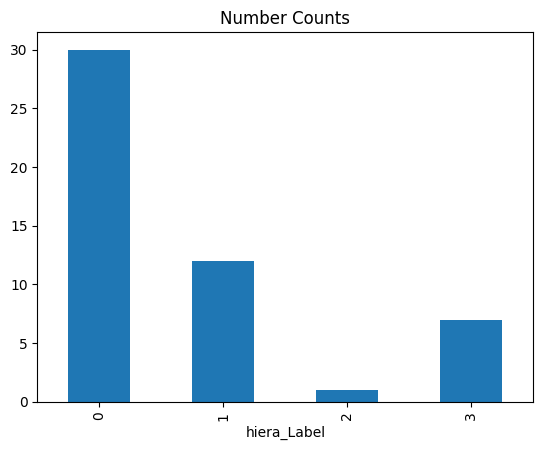

In [178]:
count = count_df.xs('Murder' ,axis = 1)
count.plot(kind='bar', title= 'Number Counts')
plt.show()

In [107]:
silhouette_avg = silhouette_score(kmeans_scaled_data, final_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.33968891433344395


# **Hierarchical Clustering**

In [108]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster import hierarchy

In [123]:
data=pd.read_csv("crime_data.csv")

In [124]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [127]:
hiera_data=data
hiera_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [128]:
#scailing the data using MinMax scalar
scaler=MinMaxScaler()
hiera_scaled_data=scaler.fit_transform(hiera_data)
hiera_scaled_data

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

# Model Building

In [130]:
# create clusters
hc_model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [131]:
hc_model.fit(hiera_scaled_data)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [132]:
hc_model.labels_

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0])

In [133]:
hiera_data["hiera_Label"]=hc_model.labels_
hiera_data

,Murder,Assault,UrbanPop,Rape,hiera_Label
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [134]:
# grouping by Labels
hiera_grp=hiera_data.groupby('hiera_Label')

In [135]:
for x,y in hiera_grp:
  print(y)
  print('_'*60)

    Murder  Assault  UrbanPop  Rape  hiera_Label
3      8.8      190        50  19.5            0
6      3.3      110        77  11.1            0
7      5.9      238        72  15.8            0
10     5.3       46        83  20.2            0
11     2.6      120        54  14.2            0
13     7.2      113        65  21.0            0
14     2.2       56        57  11.3            0
15     6.0      115        66  18.0            0
16     9.7      109        52  16.3            0
18     2.1       83        51   7.8            0
20     4.4      149        85  16.3            0
22     2.7       72        66  14.9            0
25     6.0      109        53  16.4            0
26     4.3      102        62  16.5            0
28     2.1       57        56   9.5            0
29     7.4      159        89  18.8            0
33     0.8       45        44   7.3            0
34     7.3      120        75  21.4            0
35     6.6      151        68  20.0            0
36     4.9      159 

In [136]:
hiera_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
hiera_Label,,,,
0,4.870000,114.433333,63.633333,15.943333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714


In [137]:
count_df = hiera_data.groupby(['hiera_Label']).count()
count_df

,Murder,Assault,UrbanPop,Rape
hiera_Label,,,,
0,30,30,30,30
1,12,12,12,12
2,1,1,1,1
3,7,7,7,7


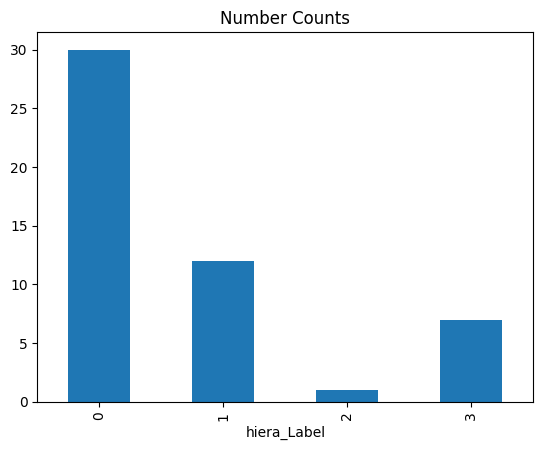

In [179]:
count = count_df.xs('Murder' ,axis = 1)
count.plot(kind='bar', title= 'Number Counts')
plt.show()

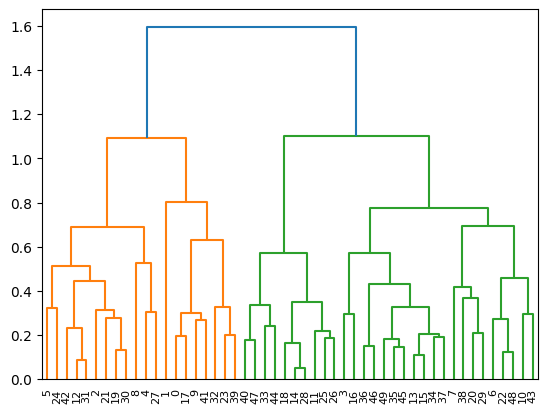

In [139]:
hiera=hierarchy.linkage(hiera_scaled_data,method='complete')
dendrogram=hierarchy.dendrogram(hiera)

In [140]:
silhouette_avg = silhouette_score(hiera_scaled_data, hc_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.36992391140277175


# **DBSCAN Clustering**

In [141]:
#import DBSCAN libraries
from sklearn.cluster import DBSCAN

In [158]:
data=pd.read_csv("crime_data.csv")

In [159]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [160]:
dbscan_data=data
dbscan_data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [161]:
# Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dbscan_scaled_data =scaler.fit_transform(dbscan_data)

In [163]:
dbscan_scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Model Building

In [170]:
dbscan_model=DBSCAN(min_samples=4,eps=1 )

In [171]:
dbscan_model.fit(dbscan_scaled_data)

DBSCAN(eps=1, min_samples=4)

In [172]:
dbscan_model.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [173]:
dbscan_data["dbscan_Label"]=dbscan_model.labels_
dbscan_data

,Murder,Assault,UrbanPop,Rape,dbscan_Label
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [174]:
# grouping by Labels
dbscan_grp=dbscan_data.groupby('dbscan_Label')

In [175]:
for x,y in dbscan_grp:
  print(y)
  print('_'*60)

    Murder  Assault  UrbanPop  Rape  dbscan_Label
1     10.0      263        48  44.5            -1
2      8.1      294        80  31.0            -1
3      8.8      190        50  19.5            -1
4      9.0      276        91  40.6            -1
5      7.9      204        78  38.7            -1
7      5.9      238        72  15.8            -1
8     15.4      335        80  31.9            -1
9     17.4      211        60  25.8            -1
10     5.3       46        83  20.2            -1
12    10.4      249        83  24.0            -1
19    11.3      300        67  27.8            -1
21    12.1      255        74  35.1            -1
23    16.1      259        44  17.1            -1
27    12.2      252        81  46.0            -1
30    11.4      285        70  32.1            -1
31    11.1      254        86  26.1            -1
32    13.0      337        45  16.1            -1
42    12.7      201        80  25.5            -1
__________________________________________________

In [176]:
dbscan_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
dbscan_Label,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


In [177]:
silhouette_avg = silhouette_score(dbscan_scaled_data, dbscan_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2051154919322


# **INFERENCES**


*   Kmeans Clustering:- \
Silhouette Score: 0.33968891433344395


*   Hierarchical Clustering:- \
Silhouette Score: 0.36992391140277175


*   DBSCANclustering:- \
Silhouette Score: 0.2051154919322




